## Preparation

Imported necessary packages

In [92]:
using ForwardDiff
using NBInclude
@nbinclude("Visualization.ipynb");

Defined Rosenbrock function

In [93]:
rosenbrock(x) = sum([100*(x[i+1]-x[i]^2)^2 + (1-x[i])^2 for i in 1:(length(x)-1)])

rosenbrock (generic function with 1 method)

Defined util functions for logging the results of optimizations

In [94]:
function log(x, y, last::Bool=false)
    n = length(y)
    for i in (last ? n : 1):n
        println("function value in iteration $i for x=$(x[:, i]) is $(y[i])")
    end
end

log (generic function with 4 methods)

In [95]:
log(xy::Tuple, last::Bool=false) = log(xy[1], xy[2], last)

log (generic function with 4 methods)

In [96]:
ITERS = 10000;
ERROR = 10e-6;

## Gradient Descent

In [97]:
rosenbrock_gradient(x) = ForwardDiff.gradient(rosenbrock, x)

rosenbrock_gradient (generic function with 1 method)

In [98]:
function rosenbrock_gradient_descent(x, learningRate, max_iters, max_error=0)
    dimensions = length(x)
    arguments = zeros(dimensions, max_iters)
    values = zeros(max_iters)
    
    for i in 1:max_iters
        gradient = rosenbrock_gradient(x)
        x -= (learningRate * gradient)
        
        arguments[1, i] = x[1]
        arguments[2, i] = x[2]
        values[i] = rosenbrock(x)
        
        if values[i] < max_error
            return (arguments[:, 1:i], values[1:i], i)
        end
    end
    return (arguments, values, max_iters)
end

rosenbrock_gradient_descent (generic function with 3 methods)

In [115]:
log(rosenbrock_gradient_descent(rand(2), 1, 5))

function value in iteration 1 for x=[2.3711709606347604, -4.293271832205558] is 9834.037475218012
function value in iteration 2 for x=[-9405.121471552138, 1978.8514395204204] is 7.824168681186807e17
function value in iteration 3 for x=[3.32769491267923e14, 1.7690868187493748e10] is 1.2262358560850705e60
function value in iteration 4 for x=[-1.4739762968207806e46, 2.2147106863742457e31] is 4.720217368258602e186
function value in iteration 5 for x=[1.280947971399442e141, 4.345212247179004e94] is Inf


In [116]:
arg, val = rosenbrock_gradient_descent(rand(2), 0.001953125, ITERS, ERROR)
log(arg, val, true)

function value in iteration 5575 for x=[0.9968419290013463, 0.9936811700542166] is 9.98944343854327e-6


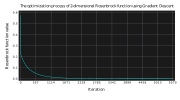

In [117]:
y = [round(v, digits=8) for v in val]
visualize_training_process(length(y), y, 
    "The optimization process of 2-dimensional Rosenbrock function using Gradient Descent", 
    "Iteration", "Rosenbrock function value")

In [118]:
ax = LinRange(0, 1.5, 100);
levels = [LinRange(0, 100, 20)...];

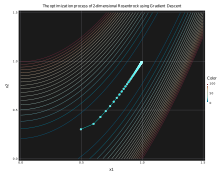

In [119]:
contour_cost(
    ax, ax,
    (x, y) -> rosenbrock( [x, y] ), 
    levels, arg, 100,
    "The optimization process of 2-dimensional Rosenbrock using Gradient Descent",
    "x1", "x2",
)

## Newton

In [104]:
rosenbrock_hessian(x) = ForwardDiff.hessian(rosenbrock, x)

rosenbrock_hessian (generic function with 1 method)

In [120]:
function rosenbrock_newton(x, max_iters, max_error=0)
    dimensions = length(x)
    arguments = zeros(dimensions, max_iters)
    values = zeros(max_iters)
    
    for i in 1:max_iters
        hessian = rosenbrock_hessian(x)
        hessian_inverted = inv(hessian)
        gradient = rosenbrock_gradient(x)
        x -= hessian_inverted * gradient
        
        arguments[1, i] = x[1]
        arguments[2, i] = x[2]
        values[i] = rosenbrock(x)
        
        if values[i] < max_error
            return (arguments[:, 1:i], values[1:i], i)
        end
    end
    return (arguments, values)
end
    

rosenbrock_newton (generic function with 2 methods)

In [121]:
arg, val = rosenbrock_newton(rand(2), ITERS, ERROR)
log(arg, val)

function value in iteration 1 for x=[0.7483364884668939, 0.5462164393514715] is 0.08235385833821916
function value in iteration 2 for x=[0.815300114583901, 0.6602301496177838] is 0.036124787367690266
function value in iteration 3 for x=[0.9126732734831645, 0.8234909720564538] is 0.016615902211215755
function value in iteration 4 for x=[0.9428243397068464, 0.888008648749226] is 0.0033517000099378756
function value in iteration 5 for x=[0.9912037782582469, 0.9801443599588752] is 0.0006252003443173743
function value in iteration 6 for x=[0.9971952895798619, 0.9943625473523475] is 7.9952686739975e-6


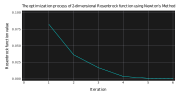

In [122]:
y = [round(v, digits=8) for v in val]
visualize_training_process(length(y), y, 
    "The optimization process of 2-dimensional Rosenbrock function using Newton's Method", 
    "Iteration", "Rosenbrock function value")

In [123]:
ax = LinRange(0, 1.5, 100);
levels = [LinRange(0, 100, 20)...];

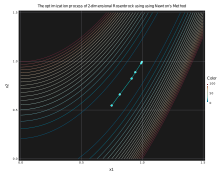

In [124]:
contour_cost(
    ax, ax,
    (x, y) -> rosenbrock( [x, y] ), 
    levels, arg, 1,
    "The optimization process of 2-dimensional Rosenbrock using using Newton's Method",
    "x1", "x2",
)

## 4-dimension functions

In [125]:
log(rosenbrock_gradient_descent(zeros(4), 1, 5))

function value in iteration 1 for x=[2.0, 2.0, 0.0, 0.0] is 2403.0
function value in iteration 2 for x=[-1600.0, -1200.0, 0.0, 0.0] is 7.009447403851203e15
function value in iteration 3 for x=[1.639168001602e12, 6.93056241202e11, 0.0, 0.0] is 5.950592759290638e53
function value in iteration 4 for x=[-1.7616936705912477e39, -1.3315743716473421e38, 0.0, 0.0] is 5.373886071432001e167
function value in iteration 5 for x=[2.187012037085861e120, 9.444006446884544e116, 0.0, 0.0] is Inf


In [126]:
arg, val = rosenbrock_gradient_descent(zeros(4), 0.001, ITERS, ERROR)
log(arg, val, true)

function value in iteration 9893 for x=[0.9993129371624921, 0.9986237607279519, 0.0, 0.0] is 9.990977777189374e-6


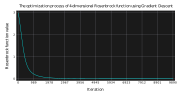

In [127]:
visualize_training_process(length(val), val, 
    "The optimization process of 4-dimensional Rosenbrock function using Gradient Descent", 
    "Iteration", "Rosenbrock function value")

In [131]:
arg, val = rosenbrock_newton(rand(4), ITERS, ERROR)
log(arg, val)

function value in iteration 1 for x=[0.9688312830661701, 0.8473451730251736, 0.0, 0.0] is 4.612238216985305
function value in iteration 2 for x=[0.9048411586451259, 0.8081221658545777, 0.0, 0.0] is 0.21172180819721925
function value in iteration 3 for x=[0.938442637265843, 0.8795995720803417, 0.0, 0.0] is 0.10241886954920285
function value in iteration 4 for x=[0.9557533068399353, 0.9129488087670011, 0.0, 0.0] is 0.03961141934086716
function value in iteration 5 for x=[0.9840029470993552, 0.967395308615917, 0.0, 0.0] is 0.01721076142121339
function value in iteration 6 for x=[0.989461982312603, 0.9789564738050185, 0.0, 0.0] is 0.002354685453052954
function value in iteration 7 for x=[0.999103776870941, 0.9981116292526555, 0.0, 0.0] is 0.00023909197241445563
function value in iteration 8 for x=[0.9998073824435518, 0.9996134110953292, 0.0, 0.0] is 8.052018824618167e-7


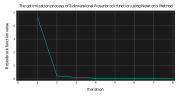

In [132]:
visualize_training_process(length(val), val, 
    "The optimization process of 2-dimensional Rosenbrock function using Newton's Method", 
    "Iteration", "Rosenbrock function value")